In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('data.csv', parse_dates = [0])
df.head(10)

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
1,2020-W53,AT,7388778.0,61425.0,0.0,5311,NaN,0,0,0,AT,ALL,COM,8901064
2,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,NVXD,8901064
3,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064
4,2020-W53,AT,7388778.0,0.0,0.0,3,NaN,0,0,0,AT,ALL,UNK,8901064
5,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
6,2020-W53,AT,433755.0,0.0,0.0,0,NaN,0,0,0,AT,Age0_4,NVXD,8901064
7,2020-W53,AT,433755.0,0.0,0.0,1,NaN,0,0,0,AT,Age0_4,COM,8901064
8,2020-W53,AT,433755.0,0.0,0.0,0,NaN,0,0,0,AT,Age0_4,UNK,8901064
9,2020-W53,AT,433755.0,0.0,0.0,0,NaN,0,0,0,AT,Age0_4,AZ,8901064


In [81]:
#dejo solo los datos sin distinguir edad
df1 = df[df['TargetGroup']=='ALL']
df1.value_counts('ReportingCountry')
df1.head(10)


,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
1,2020-W53,AT,7388778.0,61425.0,0.0,5311,NaN,0,0,0,AT,ALL,COM,8901064
2,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,NVXD,8901064
3,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064
4,2020-W53,AT,7388778.0,0.0,0.0,3,NaN,0,0,0,AT,ALL,UNK,8901064
5,2020-W53,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
72,2021-W01,AT,7388778.0,61425.0,0.0,26317,NaN,0,0,0,AT,ALL,COM,8932664
73,2021-W01,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8932664
74,2021-W01,AT,7388778.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8932664
75,2021-W01,AT,7388778.0,0.0,0.0,2,NaN,0,0,0,AT,ALL,UNK,8932664


In [82]:
df_total = df1.groupby(['ReportingCountry','YearWeekISO']).agg(First_dose =('FirstDose', 'sum'), Second_dose =('SecondDose', 'sum')).reset_index()
# df_sd = df1.groupby(['ReportingCountry','YearWeekISO']).agg(Second_dose =('SecondDose', 'sum'))
# df_total = pd.concat([df_fd, df_sd], axis=1)
# df_total.reset_index()
df_total

,ReportingCountry,YearWeekISO,First_dose,Second_dose
0,AT,2020-W53,5314,0
1,AT,2021-W01,26319,0
2,AT,2021-W02,85166,403
3,AT,2021-W03,93534,4628
4,AT,2021-W04,31724,17595
...,...,...,...,...
2178,SK,2022-W16,151,360
2179,SK,2022-W17,159,286
2180,SK,2022-W18,150,220
2181,SK,2022-W19,119,178


In [83]:
from countries import CC
df_total['ReportingCountry']=df_total['ReportingCountry'].map(CC).apply(lambda x: str(x).capitalize())
df_total



,ReportingCountry,YearWeekISO,First_dose,Second_dose
0,Austria,2020-W53,5314,0
1,Austria,2021-W01,26319,0
2,Austria,2021-W02,85166,403
3,Austria,2021-W03,93534,4628
4,Austria,2021-W04,31724,17595
...,...,...,...,...
2178,Slovakia,2022-W16,151,360
2179,Slovakia,2022-W17,159,286
2180,Slovakia,2022-W18,150,220
2181,Slovakia,2022-W19,119,178


In [87]:
df_total=df_total.rename(columns = {'YearWeekISO': 'Week since start'})

df_total.dropna()


,ReportingCountry,Week since start,First_dose,Second_dose
0,Austria,2020-W53,5314,0
1,Austria,2021-W01,26319,0
2,Austria,2021-W02,85166,403
3,Austria,2021-W03,93534,4628
4,Austria,2021-W04,31724,17595
...,...,...,...,...
2178,Slovakia,2022-W16,151,360
2179,Slovakia,2022-W17,159,286
2180,Slovakia,2022-W18,150,220
2181,Slovakia,2022-W19,119,178


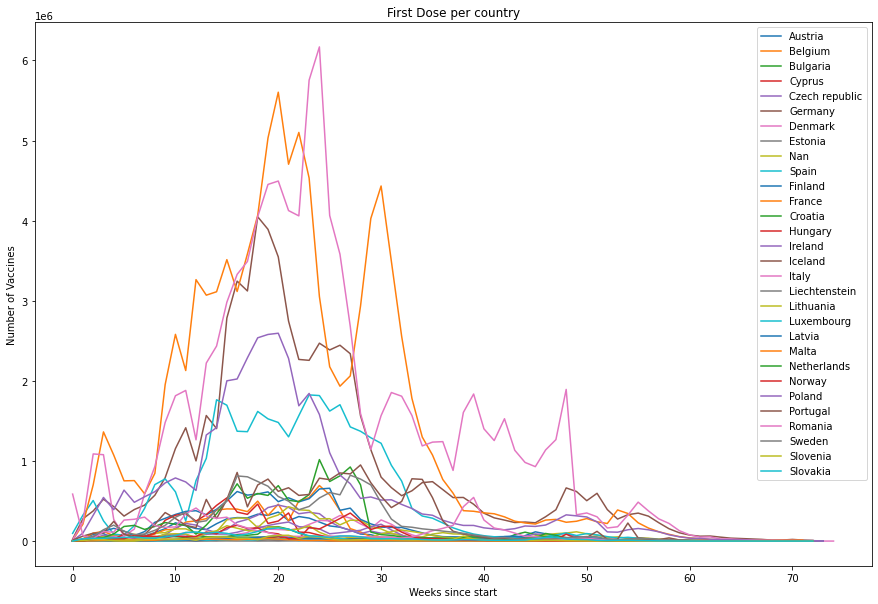

In [85]:
countries = df_total['ReportingCountry'].unique()

fig, ax = plt.subplots(figsize=(15,10))
for country in countries:
    df_copia = df_total.copy()
    df_copia=df_copia[df_copia['ReportingCountry']==country]
    df_copia['Week since start'] =  np.arange(len(df_copia))

    ax.plot(df_copia['Week since start'], df_copia['First_dose'], label=country)
    ax.set_xlabel('Weeks since start')
    ax.set_ylabel('Number of Vaccines')
    ax.set_title('First Dose per country')

ax.legend()

(0.0, 70.0)

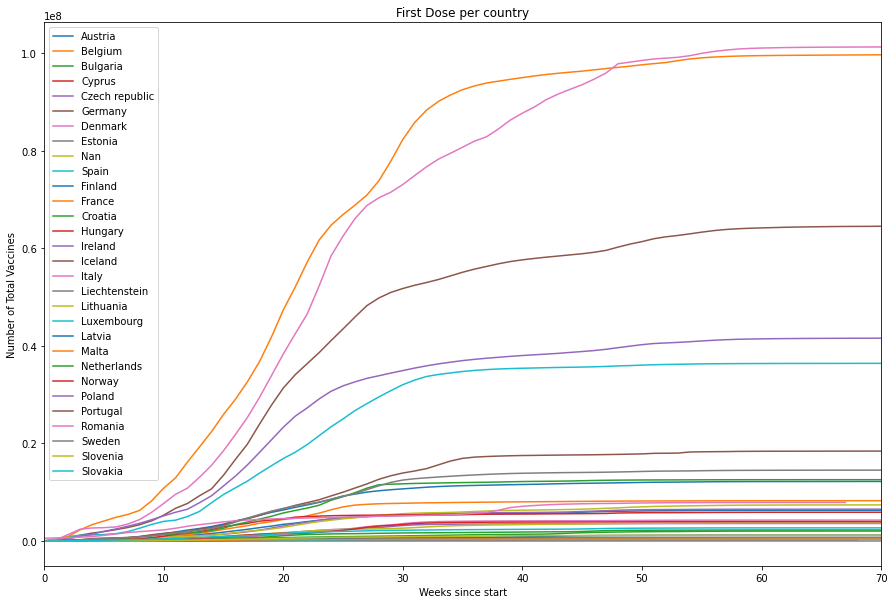

In [94]:
#vacunas acumuladas semana a semana
fig, ax = plt.subplots(figsize=(15,10))
for country in countries:
    df_copia = df_total.copy()
    df_copia=df_copia[df_copia['ReportingCountry']==country]
    df_copia['Week since start'] =  np.arange(len(df_copia))

    df_copia['First dose accumulated']= df_copia['First_dose'].cumsum()
    
    ax.plot(df_copia['Week since start'], df_copia['First dose accumulated'], label=country)
    ax.set_xlabel('Weeks since start')
    ax.set_ylabel('Number of Total Vaccines')
    ax.set_title('First Dose per country')

ax.legend()
ax.set_xlim(0,70)